# Fetal Health Classification

Analysis of the dataset of CTG data is the first step.

In [52]:
%reset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB

np.random.seed(0)

In [53]:
data = pd.read_csv("../dataset/fetal_health.csv")
data.info()
data.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

,count,mean,std,min,25%,50%,75%,max
baseline value,2126.0,133.303857,9.840844,106.0,126.000,133.000,140.000,160.000
accelerations,2126.0,0.003178,0.003866,0.0,0.000,0.002,0.006,0.019
fetal_movement,2126.0,0.009481,0.046666,0.0,0.000,0.000,0.003,0.481
uterine_contractions,2126.0,0.004366,0.002946,0.0,0.002,0.004,0.007,0.015
light_decelerations,2126.0,0.001889,0.002960,0.0,0.000,0.000,0.003,0.015
severe_decelerations,2126.0,0.000003,0.000057,0.0,0.000,0.000,0.000,0.001
prolongued_decelerations,2126.0,0.000159,0.000590,0.0,0.000,0.000,0.000,0.005
abnormal_short_term_variability,2126.0,46.990122,17.192814,12.0,32.000,49.000,61.000,87.000
mean_value_of_short_term_variability,2126.0,1.332785,0.883241,0.2,0.700,1.200,1.700,7.000
percentage_of_time_with_abnormal_long_term_variability,2126.0,9.846660,18.396880,0.0,0.000,0.000,11.000,91.000


<AxesSubplot:xlabel='fetal_health', ylabel='count'>

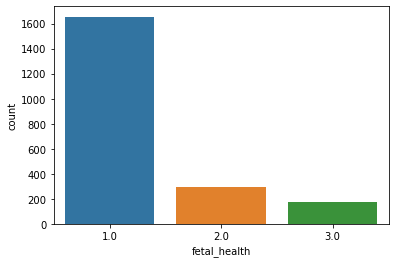

In [54]:
# Check the presence of data imbalance which requires careful attention during the validation of the final results of the models. In particular it tends to provide misleading calssification accuracy
sns.countplot(data= data, x="fetal_health")

Having verified the presence of class imbalance we will use different performance measures for our models:
* Prevision
* Accuracy 
* Recall
* Confusion Matrix
* F1 Score

<AxesSubplot:>

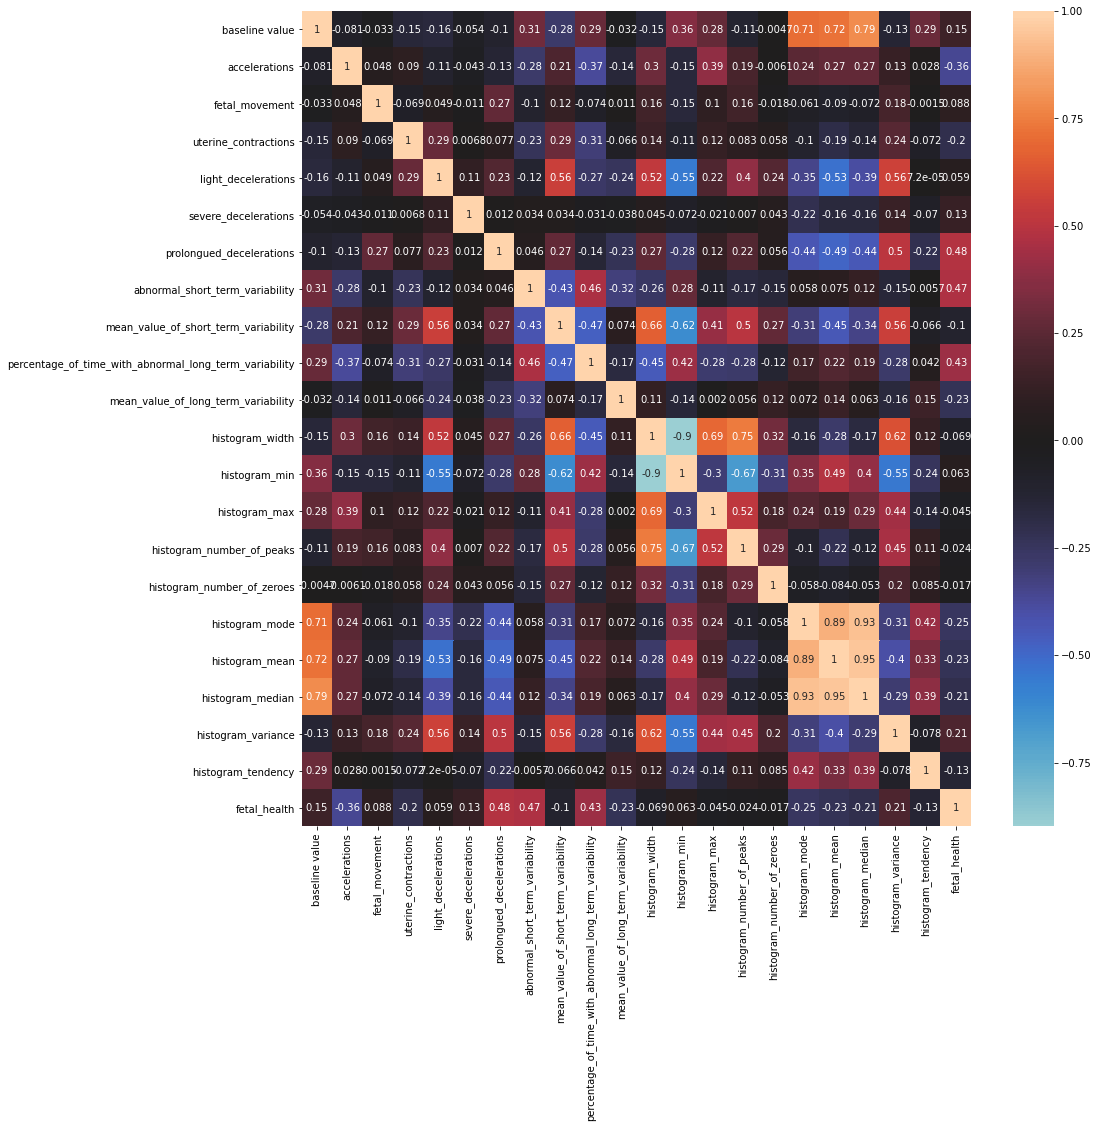

In [55]:
corrmat= data.corr()
plt.figure(figsize=(15,15))  
sns.heatmap(corrmat,annot=True,center=0)

We can that the values of "accelerations","prolongued_decelerations", "abnormal_short_term_variability", "percentage_of_time_with_abnormal_long_term_variability" and "mean_value_of_long_term_variability" are the features with high correlation with fetal_health.

# TODO maybe provide a plot of them to check the correlation and keep in mind for feature selection/ dimensionality reduction

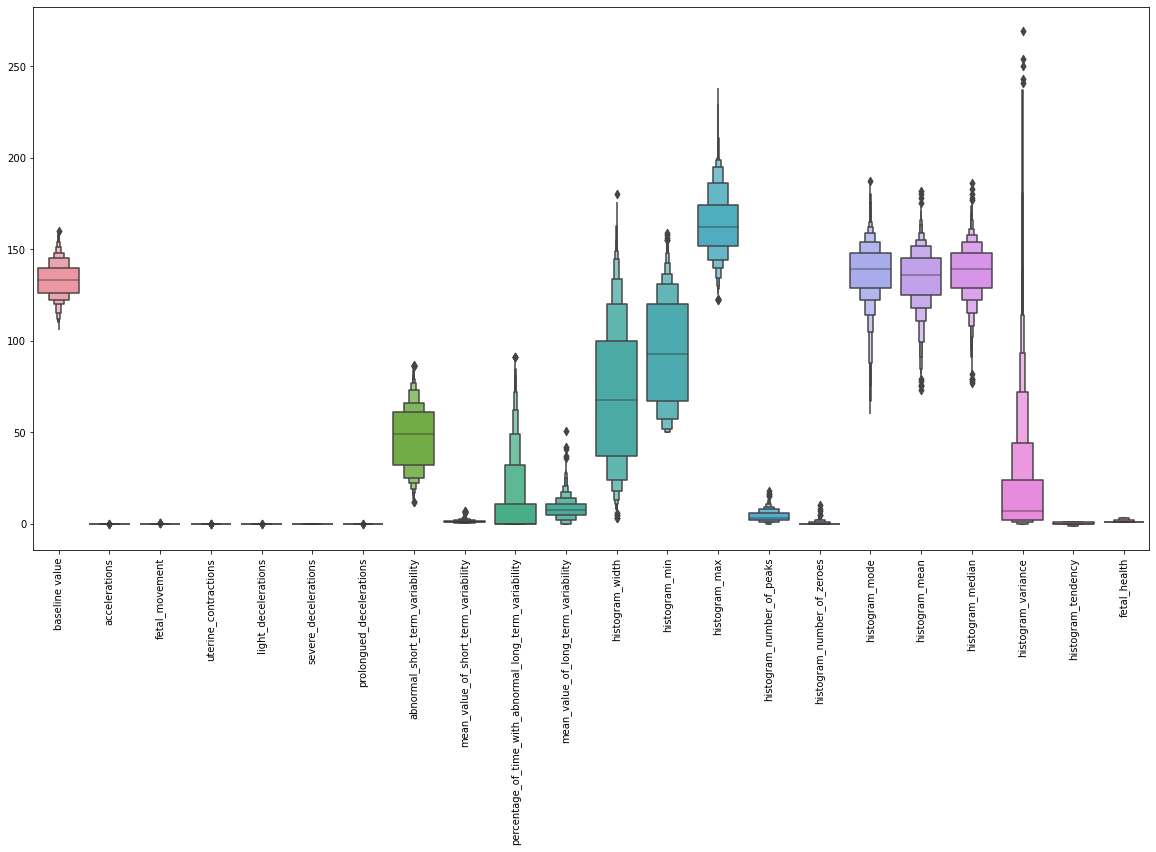

In [56]:
# Check if we need scaling of the features
plt.figure(figsize=(20,10))
sns.boxenplot(data = data)
plt.xticks(rotation=90)
plt.show()

In [57]:
X = data.drop(["fetal_health"], axis=1)
y = data["fetal_health"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=list(X.columns))
X_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
baseline value,2126.0,1.069490e-15,1.000235,-2.775197,-0.742373,-0.030884,0.680604,2.713428
accelerations,2126.0,-4.010589e-17,1.000235,-0.822388,-0.822388,-0.304881,0.730133,4.093929
fetal_movement,2126.0,-1.336863e-17,1.000235,-0.203210,-0.203210,-0.203210,-0.138908,10.106540
uterine_contractions,2126.0,-1.336863e-16,1.000235,-1.482465,-0.803434,-0.124404,0.894142,3.610264
light_decelerations,2126.0,-5.347452e-17,1.000235,-0.638438,-0.638438,-0.638438,0.375243,4.429965
severe_decelerations,2126.0,6.684315e-18,1.000235,-0.057476,-0.057476,-0.057476,-0.057476,17.398686
prolongued_decelerations,2126.0,1.336863e-17,1.000235,-0.268754,-0.268754,-0.268754,-0.268754,8.208570
abnormal_short_term_variability,2126.0,-7.352747e-17,1.000235,-2.035639,-0.872088,0.116930,0.815060,2.327675
mean_value_of_short_term_variability,2126.0,6.684315e-17,1.000235,-1.282833,-0.716603,-0.150373,0.415857,6.417893
percentage_of_time_with_abnormal_long_term_variability,2126.0,-5.347452e-17,1.000235,-0.535361,-0.535361,-0.535361,0.062707,4.412293


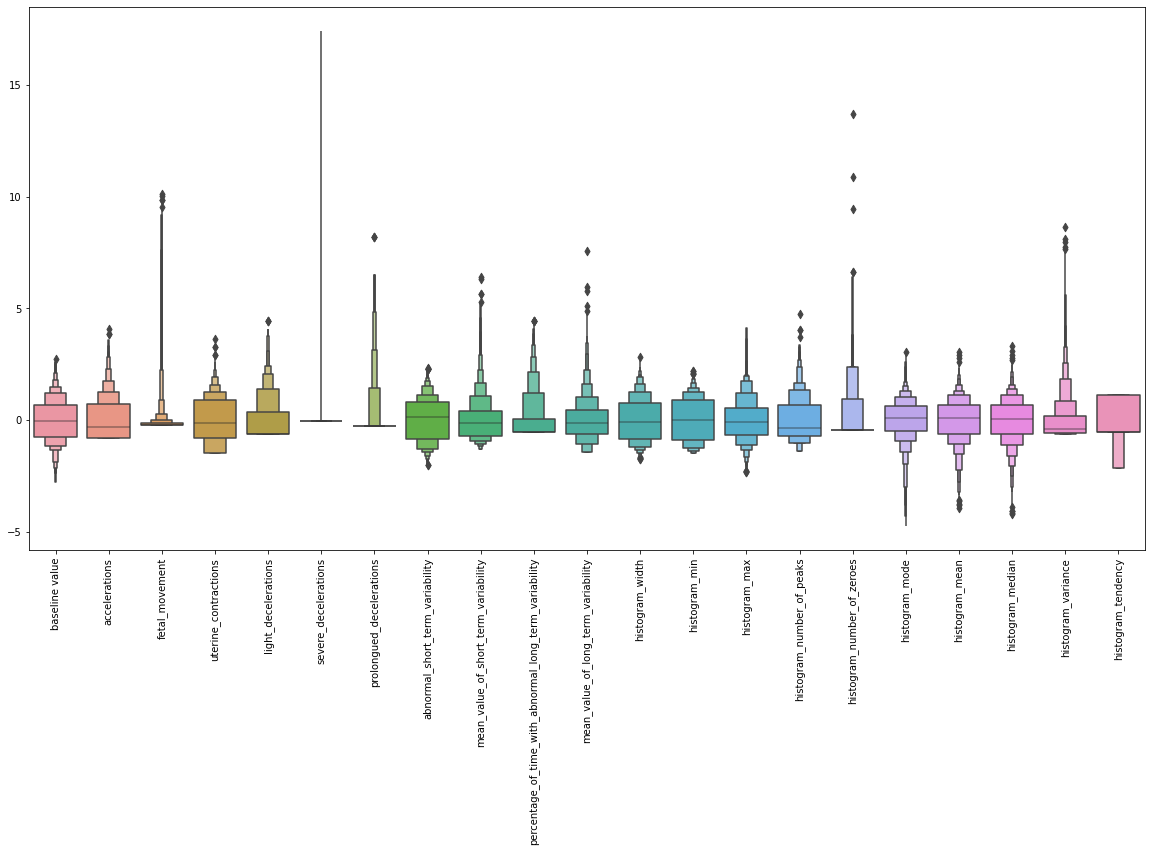

In [58]:
# Check the actual scaled version
plt.figure(figsize=(20,10))
sns.boxenplot(data = X_scaled)
plt.xticks(rotation=90)
plt.show()

SVM linear
Accuracy      :  0.8981191222570533
Recall        :  0.8981191222570533
Precision     :  0.9001981905614911
F1 Score      :  0.8988139810348892


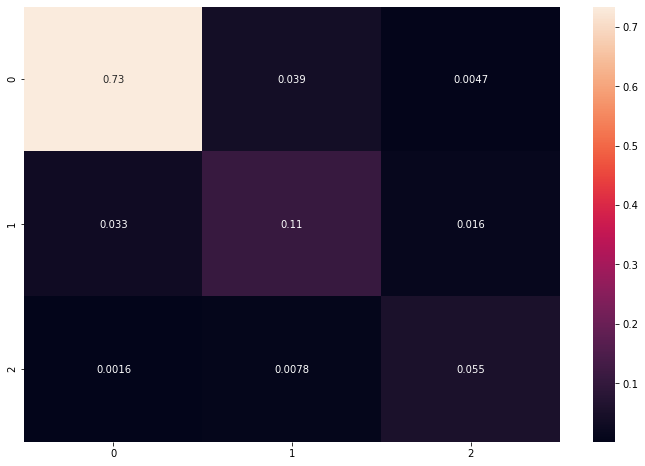

SVM poly
Accuracy      :  0.8934169278996865
Recall        :  0.8934169278996865
Precision     :  0.886837218799169
F1 Score      :  0.8873598467818649


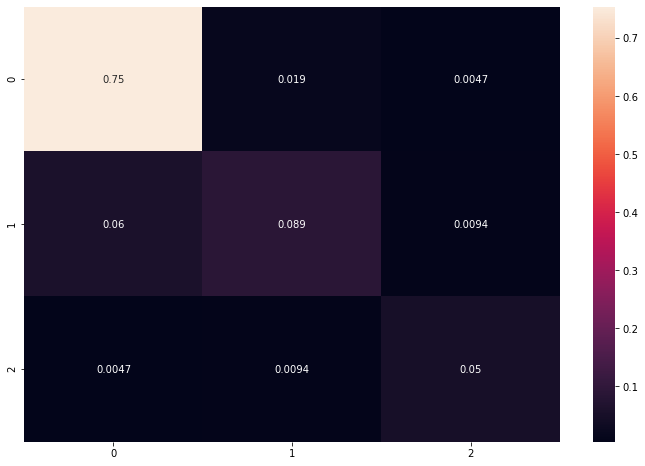

SVM rbf
Accuracy      :  0.9169278996865203
Recall        :  0.9169278996865203
Precision     :  0.9146873838954398
F1 Score      :  0.9155033871599867


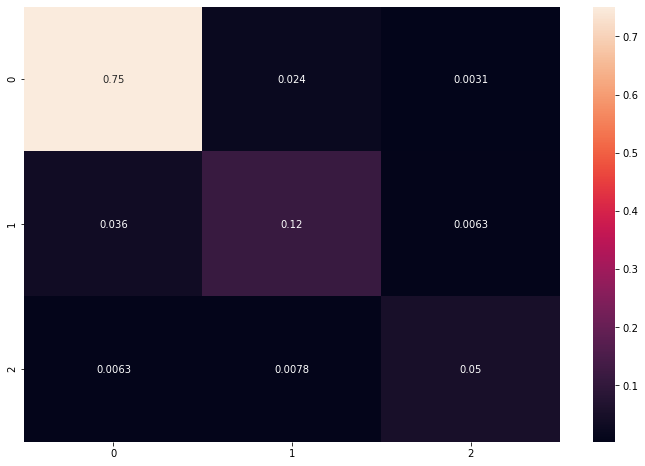

SVM sigmoid
Accuracy      :  0.768025078369906
Recall        :  0.768025078369906
Precision     :  0.8006665522787368
F1 Score      :  0.7811206542283509


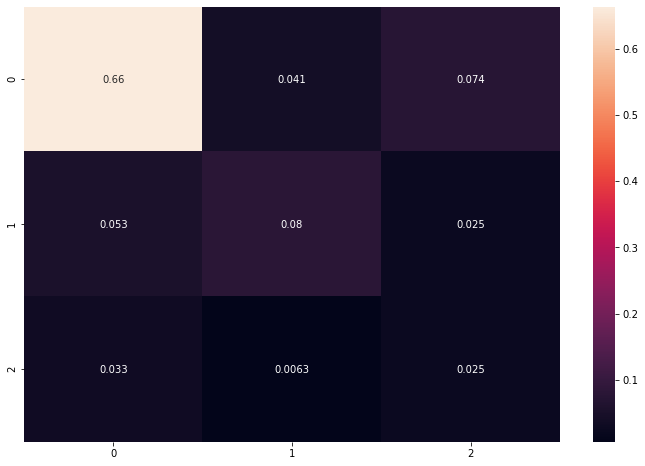

Gaussian NB
Accuracy      :  0.6974921630094044
Recall        :  0.6974921630094044
Precision     :  0.8591499492568186
F1 Score      :  0.73146394751714


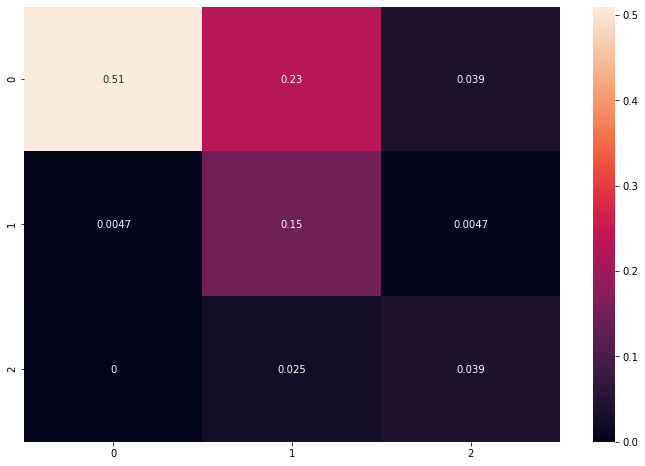

In [76]:
X_train, X_test, y_train,y_test = train_test_split(X_scaled,y,test_size=0.3,random_state=42)

pipeline_svm_linear=Pipeline([('svm_classifier_linear',SVC(kernel='linear'))])
pipeline_svm_poly=Pipeline([('svm_classifier_poly',SVC(kernel='poly'))])
pipeline_svm_rbf=Pipeline([('svm_classifier_rbf',SVC(kernel='rbf'))])
pipeline_svm_sigmoid=Pipeline([('svm_classifier_sigmoid',SVC(kernel='sigmoid'))])
pipeline_gaussian=Pipeline([('gaussian_classifier',GaussianNB())])

pipelines = [
    pipeline_svm_linear, 
    pipeline_svm_poly, 
    pipeline_svm_rbf, 
    pipeline_svm_sigmoid,
    pipeline_gaussian,
]

pipe_dict = {
    0: 'SVM linear', 
    1: 'SVM poly', 
    2: 'SVM rbf', 
    3: "SVM sigmoid",
    4: "Gaussian NB"
}

for pipe in pipelines:
    pipe.fit(X_train, y_train)

for i, model in enumerate(pipelines):
    predictions=model.predict(X_test)
    acccuracy= accuracy_score(y_test,predictions)
    recall = recall_score(y_test, predictions, average="weighted")
    precision = precision_score(y_test, predictions, average="weighted")
    f1_scores = f1_score(y_test, predictions, average="weighted")
    print("%s" % (pipe_dict[i]))
    print("Accuracy      : ", acccuracy)
    print("Recall        : ", recall)
    print("Precision     : ", precision)
    print("F1 Score      : ", f1_scores)
    # print(classification_report(y_test, predictions))
    plt.subplots(figsize=(12,8))
    cf_matrix = confusion_matrix(y_test, predictions)
    sns.heatmap(cf_matrix/np.sum(cf_matrix), annot = True)
    plt.show()

# PCA analysis
We are going to analyse the possibility to reduce the dimensionality based on pca component analysis

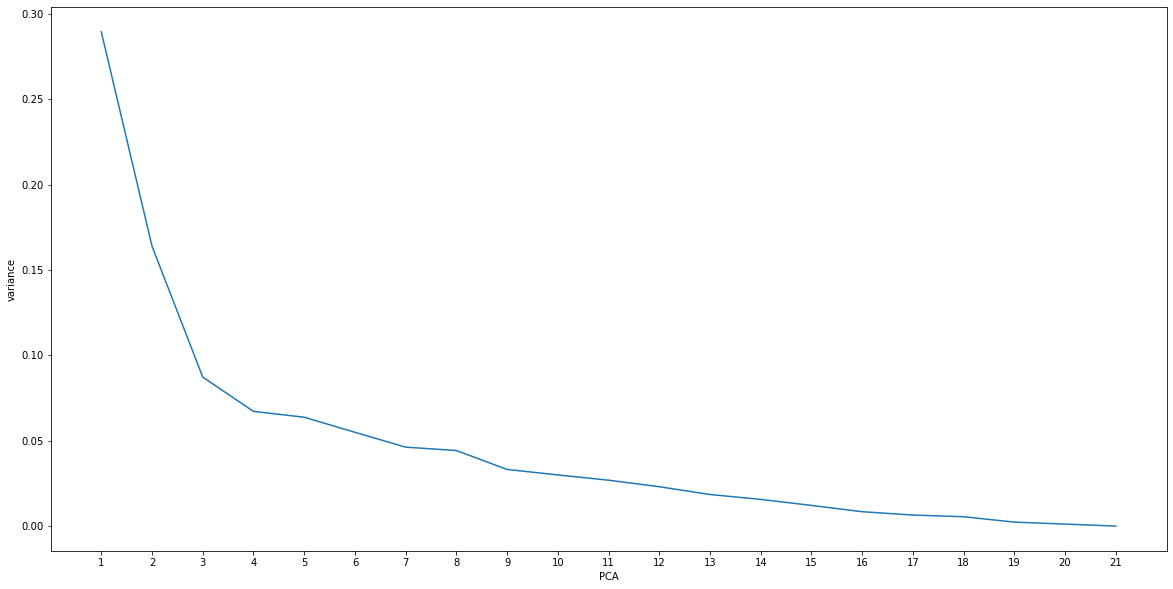

In [94]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit_transform(X_train)
pca.transform(X_test)

pca_component = np.linspace(1,21,num=21)
data = pd.DataFrame(data={'variance': pca.explained_variance_ratio_.tolist(), 'PCA': pca_component.tolist()})
plt.figure(figsize=(20,10))
ax = sns.lineplot(data=data, x='PCA', y='variance', markers=True,dashes=False)
ax.set(xticks=pca_component)
plt.show()

The last five components doesn't provide information at all so we can exclude them. Let's try some experiments with different number of components

In [95]:
for i in range(1,17):
    pca = PCA(n_components=i)
    X_train_reduced = pca.fit_transform(X_train)
    X_test_reduced = pca.transform(X_test)
    
    for pipe in pipelines:
        pipe.fit(X_train_reduced, y_train)

    data = np.zeros((len(pipelines), 4))
    a = []
    p = []
    r = []
    f1 = []
    for z, model in enumerate(pipelines):
        predictions=model.predict(X_test_reduced)
        acccuracy= accuracy_score(y_test,predictions)
        recall = recall_score(y_test, predictions, average="weighted", labels=np.unique(predictions))
        precision = precision_score(y_test, predictions, average="weighted",labels=np.unique(predictions))
        f1_scores = f1_score(y_test, predictions, average="weighted", labels=np.unique(predictions))
        a.append(acccuracy)
        p.append(precision)
        r.append(recall)
        f1.append(f1_scores)
    
    data = pd.DataFrame(data={'accuracy': a, 'precision': p, "recall": r, "f1 score": f1},
    index=['SVM linear', 'SVM poly', 'SVM rbf', "SVM sigmoid","Gaussian NB"])
    print("Number of PCA components : ", i)
    print(data.to_string())

Number of PCA components :  1
             accuracy  precision    recall  f1 score
SVM linear   0.777429   0.777429  1.000000  0.874780
SVM poly     0.782132   0.773364  0.929236  0.829880
SVM rbf      0.819749   0.797983  0.819749  0.799178
SVM sigmoid  0.725705   0.686560  0.725705  0.701204
Gaussian NB  0.799373   0.774995  0.799373  0.745308
Number of PCA components :  2
             accuracy  precision    recall  f1 score
SVM linear   0.785266   0.800095  0.932961  0.828166
SVM poly     0.849530   0.840688  0.849530  0.815887
SVM rbf      0.851097   0.834829  0.851097  0.832435
SVM sigmoid  0.656740   0.640244  0.656740  0.645066
Gaussian NB  0.835423   0.823483  0.835423  0.799433
Number of PCA components :  3
             accuracy  precision    recall  f1 score
SVM linear   0.871473   0.861289  0.871473  0.862328
SVM poly     0.874608   0.866377  0.874608  0.861041
SVM rbf      0.882445   0.874165  0.882445  0.872859
SVM sigmoid  0.699060   0.740073  0.699060  0.717810
Gaussian 

From the analysis of the PCA components we don't have a clear benefit of using less components. With 17 components (excluding the last 5 components with pretty close to zero contribution) we reached a good level according to our metrics (even the use of 3/4 components might be acceptable). Anyway do to the fact that the training time is reasonable and pretty fast it is better to use the full dataset.

# LDA (Fisher) analysis
We are going to investigate the use of Fisher dimensionality reduction over our dataset

(2,)


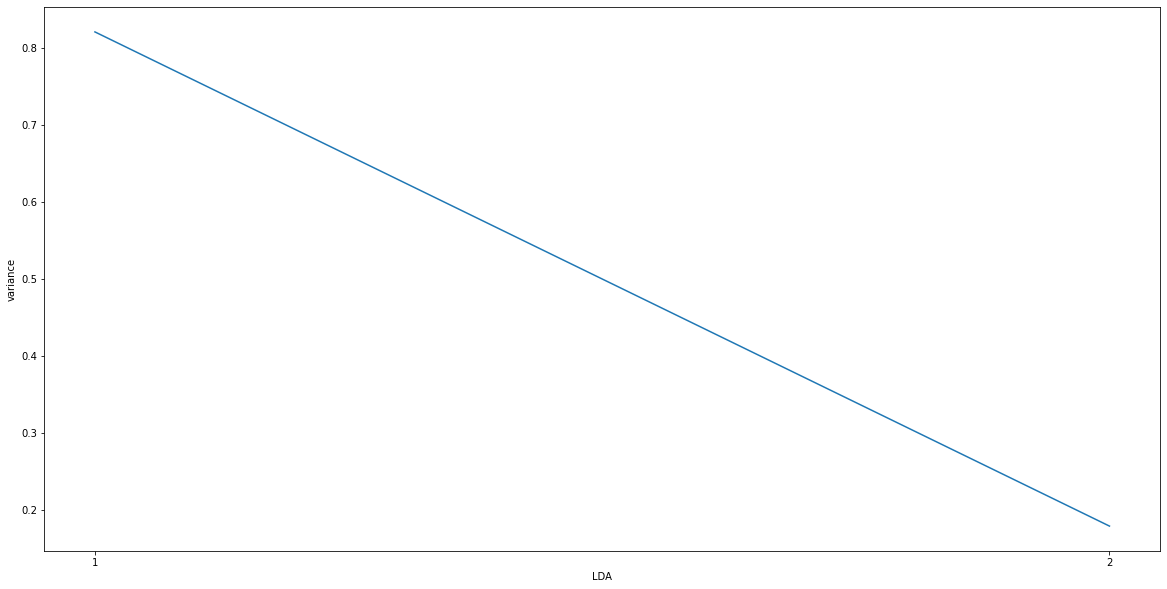

In [99]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA()
lda.fit_transform(X_train, y_train)
lda.transform(X_test)

lda_component = np.linspace(1,2,num=2)
data = pd.DataFrame(data={'variance': lda.explained_variance_ratio_.tolist(), 'LDA': lda_component.tolist()})
plt.figure(figsize=(20,10))
ax = sns.lineplot(data=data, x='LDA', y='variance', markers=True,dashes=False)
ax.set(xticks=lda_component)
plt.show()

In [104]:
for i in range(1,3):
    lda = LDA(n_components=i)
    X_train_reduced_lda = lda.fit_transform(X_train, y_train)
    X_test_reduced_lda = lda.transform(X_test)

    for pipe in pipelines:
        pipe.fit(X_train_reduced_lda, y_train)

    data = np.zeros((len(pipelines), 4))
    a = []
    p = []
    r = []
    f1 = []
    for z, model in enumerate(pipelines):
        predictions=model.predict(X_test_reduced_lda)
        acccuracy= accuracy_score(y_test,predictions)
        recall = recall_score(y_test, predictions, average="weighted", labels=np.unique(predictions))
        precision = precision_score(y_test, predictions, average="weighted",labels=np.unique(predictions))
        f1_scores = f1_score(y_test, predictions, average="weighted", labels=np.unique(predictions))
        a.append(acccuracy)
        p.append(precision)
        r.append(recall)
        f1.append(f1_scores)
    
    data = pd.DataFrame(data={'accuracy': a, 'precision': p, "recall": r, "f1 score": f1},
    index=['SVM linear', 'SVM poly', 'SVM rbf', "SVM sigmoid","Gaussian NB"])
    print("Number of LDA components : ", i)
    print(data.to_string())

Number of LDA components :  1
             accuracy  precision    recall  f1 score
SVM linear   0.847962   0.829295  0.847962  0.828071
SVM poly     0.841693   0.820448  0.841693  0.802800
SVM rbf      0.846395   0.832120  0.846395  0.836413
SVM sigmoid  0.766458   0.776691  0.766458  0.771115
Gaussian NB  0.854232   0.847738  0.854232  0.850451
Number of LDA components :  2
             accuracy  precision    recall  f1 score
SVM linear   0.898119   0.898106  0.898119  0.898103
SVM poly     0.899687   0.895180  0.899687  0.894518
SVM rbf      0.905956   0.907072  0.905956  0.906281
SVM sigmoid  0.689655   0.725761  0.689655  0.704979
Gaussian NB  0.873041   0.885894  0.873041  0.877463


LDA doesn't provide great results in fact in case of uniformly distributed data, LDA almost always performs better than PCA. However if the data is highly skewed (irregularly distributed) then it is advised to use PCA since LDA can be biased towards the majority class.